<a href="https://colab.research.google.com/github/juanpi19/medium-articles/blob/main/linear-regression-vs-decision-tree/decision_tree_vs_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

# Overfitting

In [ ]:
np.random.seed(42)

advertising_budget = np.random.uniform(12000, 30000, size=50)
true_coefficient = 0.5  # True coefficient relating advertising budget to sales
noise_sd = 1000  # Standard deviation of noise

# Simulate sales data
sales = true_coefficient * advertising_budget + np.random.normal(0, noise_sd, 50)

In [ ]:
df = pd.DataFrame({'advertising_budget': advertising_budget, 'sales': sales})

In [ ]:
model = smf.ols(formula="sales ~ advertising_budget", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     367.4
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.90e-24
Time:                        02:53:50   Log-Likelihood:                -411.47
No. Observations:                  50   AIC:                             826.9
Df Residuals:                      48   BIC:                             830.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            245.6453    526

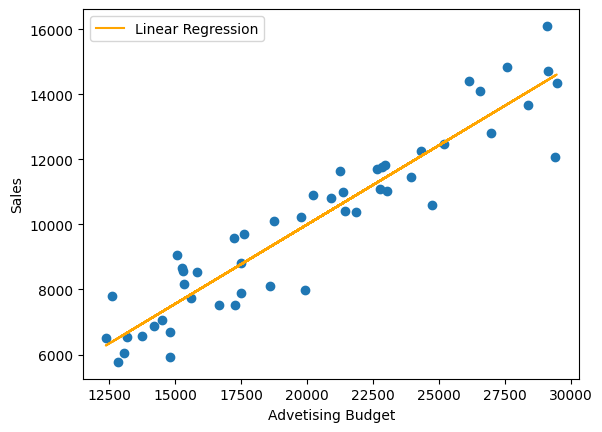

In [ ]:
plt.scatter(df['advertising_budget'], df['sales'])
plt.plot(df['advertising_budget'], model.fittedvalues, c='orange', label='Linear Regression')
plt.xlabel("Advetising Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
dt_model = DecisionTreeRegressor().fit(X=df[['advertising_budget']], y=df['sales'])
prediction_dt = dt_model.predict(df[['advertising_budget']])

In [ ]:
# Predict values
X_test = np.linspace(df['advertising_budget'].min(), df['advertising_budget'].max(), 50).reshape(-1, 1)  # Smooth stepwise curve
y_tree = dt_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


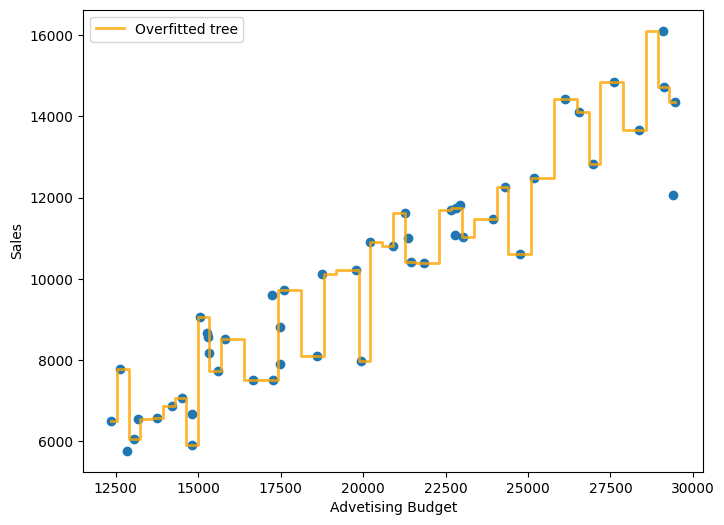

In [ ]:
# Plot
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(df['advertising_budget'], df['sales'])
plt.step(X_test, y_tree, color="orange", label="Overfitted tree", linewidth=2, alpha=0.8, where="mid")  # Step plot
plt.plot()
plt.xlabel("Advetising Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

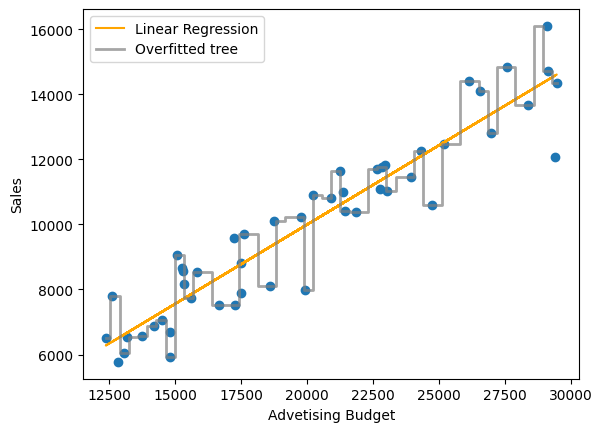

In [ ]:

plt.scatter(df['advertising_budget'], df['sales'])
plt.plot(df['advertising_budget'], model.fittedvalues, c='orange', label='Linear Regression')
plt.step(X_test, y_tree, color="gray", label="Overfitted tree", linewidth=2, alpha=0.7, where="mid")  # Step plot
plt.xlabel("Advetising Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Non Linearities

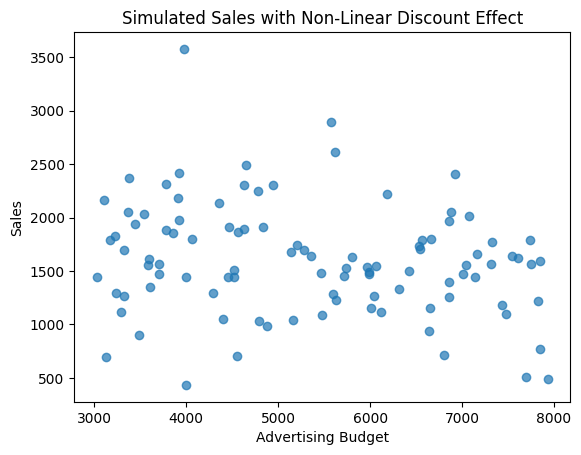

In [9]:
np.random.seed(42)

# Parameters
num_samples = 100
advertising_budget = np.random.uniform(3000, 8000, num_samples)  # Advertising budget
discount_rate = np.random.uniform(0, 0.5, num_samples)  # Discount rate (0% to 50%)

true_coefficient = 0.5
quadratic_effect = -0.00005  # Diminishing returns on advertising
discount_effect = 5000 * discount_rate - 10000 * discount_rate**2  # Boost at first, then drop
noise_sd = 500

# Simulate sales data
sales = (true_coefficient * advertising_budget +
         quadratic_effect * advertising_budget**2 +
         discount_effect +
         np.random.normal(0, noise_sd, num_samples))

# Plotting
plt.scatter(advertising_budget, sales, alpha=0.7)
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Simulated Sales with Non-Linear Discount Effect')
plt.show()



In [3]:
df2 = pd.DataFrame({'advertising_budget': advertising_budget, 'discount': discount_effect, 'sales': sales})

In [4]:
df2.head()

,advertising_budget,discount,sales
0,2498.160475,76.103480,333.118708
1,4802.857226,578.480499,2058.790933
2,3927.975767,538.840746,2024.451421
3,3394.633937,624.816358,1031.604930
4,1624.074562,209.723923,2755.654806


In [16]:
model2 = smf.ols(formula="sales ~ advertising_budget + discount", data=df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.052
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.353
Time:                        18:34:16   Log-Likelihood:                -830.80
No. Observations:                 100   AIC:                             1668.
Df Residuals:                      97   BIC:                             1675.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1116.4409    341

In [22]:
dt_model2 = DecisionTreeRegressor(max_depth=10).fit(X=df2[['advertising_budget', 'discount']], y=df2['sales'])
prediction_dt2 = dt_model2.predict(df2[['advertising_budget', 'discount']])

In [23]:
dt_model2.feature_importances_

array([0.73498183, 0.26501817])

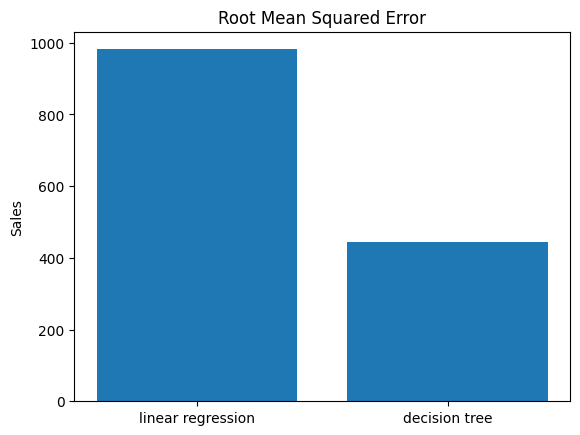

In [28]:
dt_rmse = np.sqrt(mean_squared_error(df2['sales'], prediction_dt2))
lr_rmse = np.sqrt(mean_squared_error(df2['sales'], model2.fittedvalues))

models = ['linear regression', 'decision tree']
error = [lr_rmse, dt_rmse]

plt.bar(models, error)
plt.title("Root Mean Squared Error")
plt.ylabel("Sales")
plt.show()
